#DATA LOADING

In [ ]:
import pandas as pd
df= pd.read_csv('/content/NASA Near-Earth Objects.csv.zip')
df.set_index("neo_reference_id",inplace= True)
df.head()

,Unnamed: 0,id,name,name_limited,designation,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,orbit_id,orbit_class_type,perihelion_distance,aphelion_distance,first_observation_date,last_observation_date,orbit_class_description
neo_reference_id,,,,,,,,,,,,,,,,,
2001981,0,2001981,1981 Midas (1973 EA),Midas,1981,15.22,True,False,2.401900,5.370812,229,APO,0.621512,2.931360,1973-03-06,2021-10-20,Near-Earth asteroid orbits which cross the Ear...
2002059,1,2002059,2059 Baboquivari (1963 UA),Baboquivari,2059,15.97,False,False,1.700415,3.802244,268,AMO,1.238537,4.047945,1963-10-16,2021-04-15,Near-Earth asteroid orbits similar to that of ...
2002061,2,2002061,2061 Anza (1960 UA),Anza,2061,16.36,False,False,1.420872,3.177167,180,AMO,1.050403,3.478155,1960-10-22,2021-06-12,Near-Earth asteroid orbits similar to that of ...
2002062,3,2002062,2062 Aten (1976 AA),Aten,2062,17.10,False,False,1.010543,2.259644,149,ATE,0.790185,1.143633,1955-12-17,2019-11-10,Near-Earth asteroid orbits similar to that of ...
2002063,4,2002063,2063 Bacchus (1977 HB),Bacchus,2063,17.28,False,False,0.930154,2.079888,143,APO,0.701397,1.454804,1977-04-24,2021-12-02,Near-Earth asteroid orbits which cross the Ear...


In [ ]:
print(df['is_potentially_hazardous_asteroid'].value_counts())

is_potentially_hazardous_asteroid
False    21906
True      2094
Name: count, dtype: int64


#DATA PREPROCESSING

In [ ]:
print(df.isnull().sum())

Unnamed: 0                               0
id                                       0
name                                     0
name_limited                         23856
designation                              0
absolute_magnitude_h                     8
is_potentially_hazardous_asteroid        0
is_sentry_object                         0
kilometers_estimated_diameter_min        8
kilometers_estimated_diameter_max        8
orbit_id                                 0
orbit_class_type                         0
perihelion_distance                      0
aphelion_distance                        0
first_observation_date                   0
last_observation_date                    0
orbit_class_description                  0
dtype: int64


In [ ]:
df = df.drop('name_limited', axis=1)
df=df.dropna()

In [ ]:
df.duplicated().sum()

0

In [ ]:
print(df.dtypes)

Unnamed: 0                             int64
id                                     int64
name                                  object
designation                           object
absolute_magnitude_h                 float64
is_potentially_hazardous_asteroid       bool
is_sentry_object                        bool
kilometers_estimated_diameter_min    float64
kilometers_estimated_diameter_max    float64
orbit_id                              object
orbit_class_type                      object
perihelion_distance                  float64
aphelion_distance                    float64
first_observation_date                object
last_observation_date                 object
orbit_class_description               object
dtype: object


In [ ]:
obs= df[['first_observation_date','last_observation_date']]
for col in obs:
  df[col]=pd.to_datetime(df[col], errors='coerce')
for col in obs:
  df[col]=df[col].dt.year
df.dropna(inplace=True)

In [ ]:
print(df.dtypes)

Unnamed: 0                             int64
id                                     int64
name                                  object
designation                           object
absolute_magnitude_h                 float64
is_potentially_hazardous_asteroid       bool
is_sentry_object                        bool
kilometers_estimated_diameter_min    float64
kilometers_estimated_diameter_max    float64
orbit_id                              object
orbit_class_type                      object
perihelion_distance                  float64
aphelion_distance                    float64
first_observation_date               float64
last_observation_date                  int32
orbit_class_description               object
dtype: object


#EXPLORATORY DATA ANALYSIS

<Axes: title={'center': 'is_sentry_object'}, xlabel='is_sentry_object'>

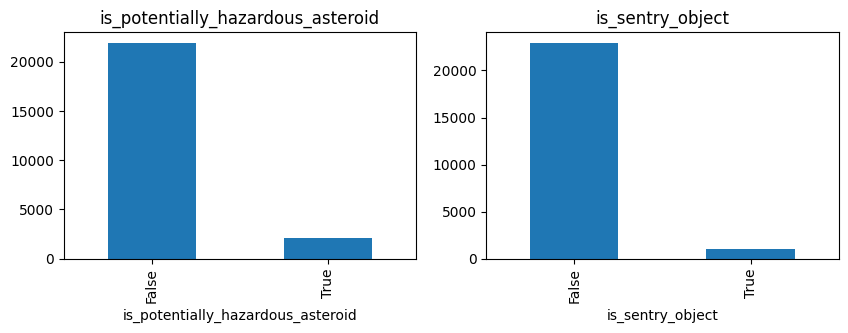

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
fig = plt.figure(figsize=(10, 10))
fig_dims = (3, 2)
plt.subplot2grid(fig_dims, (0, 0))
df['is_potentially_hazardous_asteroid'].value_counts().plot(kind='bar',title='is_potentially_hazardous_asteroid')
plt.subplot2grid(fig_dims, (0, 1))
df['is_sentry_object'].value_counts().plot(kind='bar', title='is_sentry_object')

[Text(0.5, 1.0, 'Objects classification based on diameter size and orbit type')]

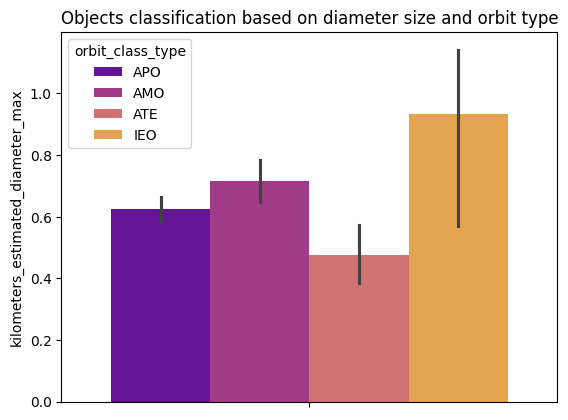

In [ ]:
sns.barplot(hue ='orbit_class_type', y ='kilometers_estimated_diameter_max', data = df,
            palette ='plasma',
            estimator = np.std).set(title='Objects classification based on diameter size and orbit type')
#Near-Earth asteroid orbits which cross the Earth’s orbit similar to that of 1862 Apollo =  APO
#Near-Earth asteroid orbits similar to that of 1221 Amor = AMO
#Near-Earth asteroid orbits similar to that of 2062 Aten = ATE
#An asteroid orbit contained entirely within the orbit of the Earth - Interior earth Object = IEO

[Text(0.5, 1.0, 'count of hazardous objects based on class type')]

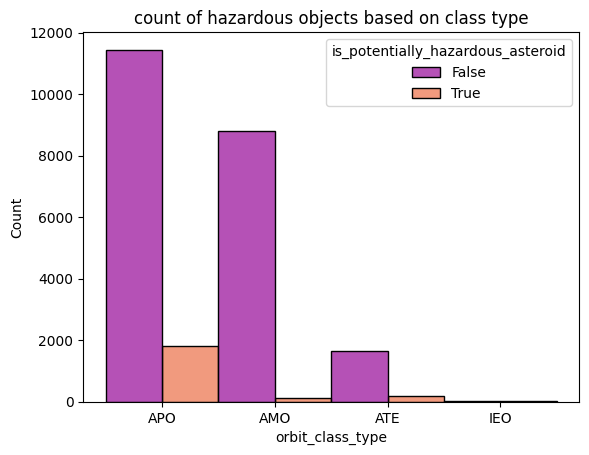

In [ ]:
sns.histplot(binwidth=1,
            x='orbit_class_type',
            hue='is_potentially_hazardous_asteroid',
            data=df,palette= 'plasma',
            stat="count",
            multiple="dodge").set(title='count of hazardous objects based on class type')

In [ ]:
import plotly.express as px
fig = px.scatter(df, y='perihelion_distance', x='aphelion_distance', color="is_potentially_hazardous_asteroid")
fig.show()

In [ ]:
fig = px.scatter(df, x="kilometers_estimated_diameter_min", y="kilometers_estimated_diameter_max", color='absolute_magnitude_h')
fig.show()

In [ ]:
fig = px.scatter(df, y="absolute_magnitude_h", x="orbit_class_type")
fig.update_traces(marker_size=10)
fig.show()


<Axes: title={'center': 'most observations in years'}, xlabel='last_observation_date'>

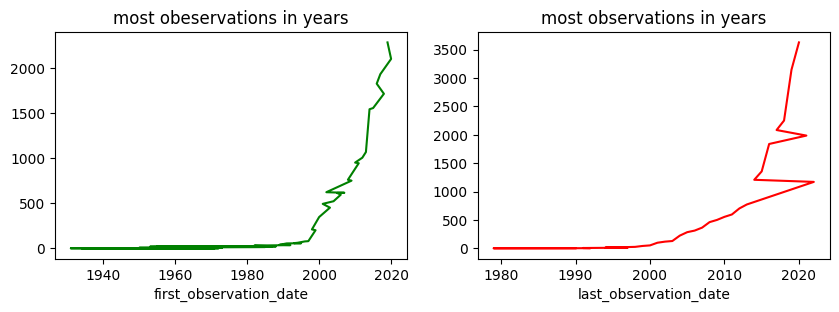

In [ ]:
fig = plt.figure(figsize=(10, 10))
fig_dims = (3, 2)
plt.subplot2grid(fig_dims, (0, 0))
df['first_observation_date'].value_counts().plot(kind='line',title='most obeservations in years', color='green')
plt.subplot2grid(fig_dims, (0, 1))
df['last_observation_date'].value_counts().plot(kind='line', title='most observations in years',color='red')

In [ ]:
num= df.select_dtypes([int,float])

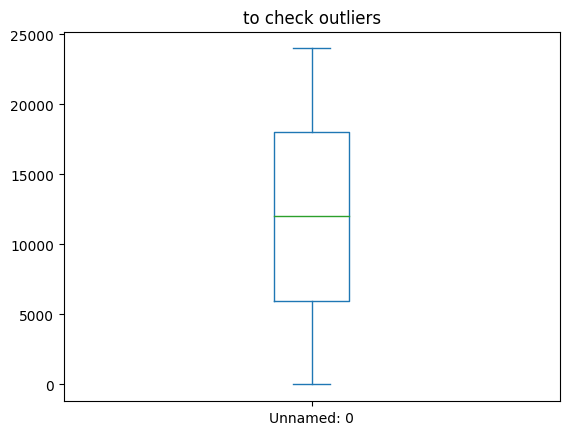

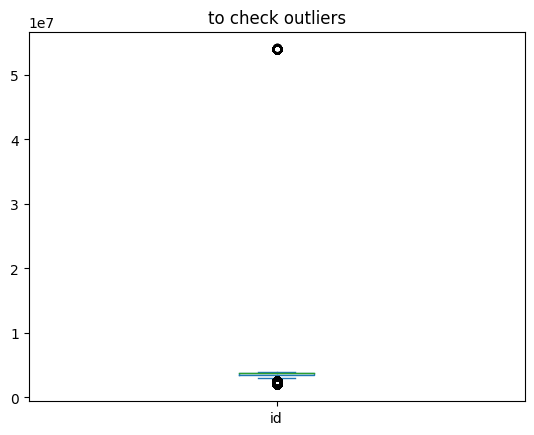

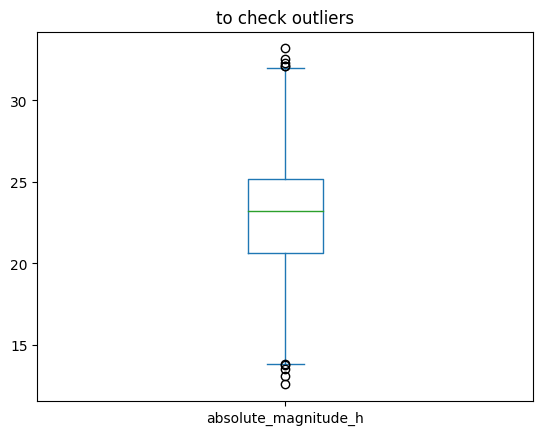

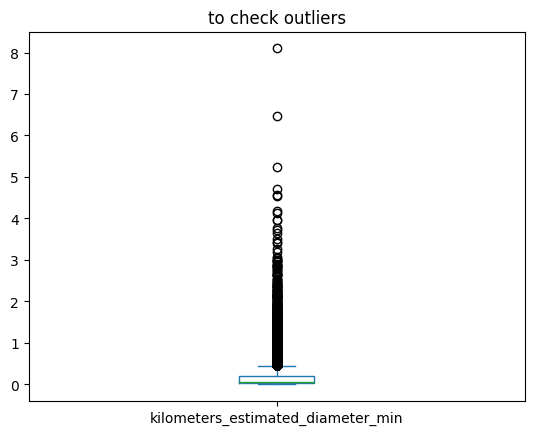

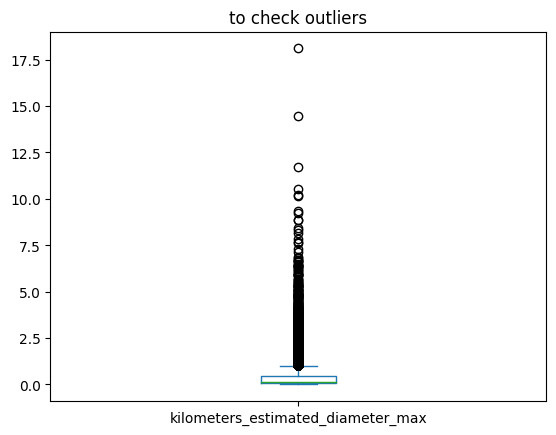

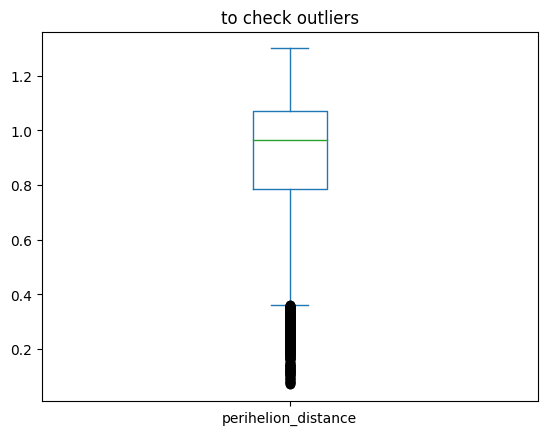

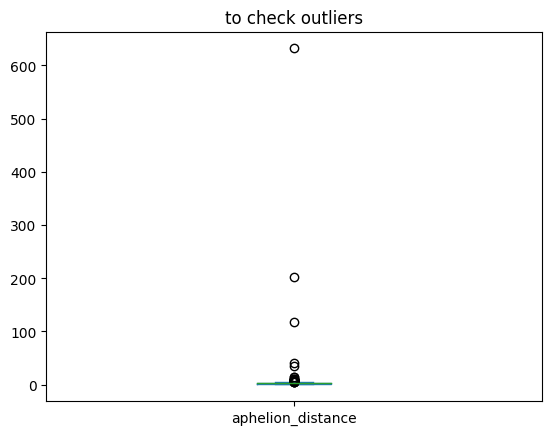

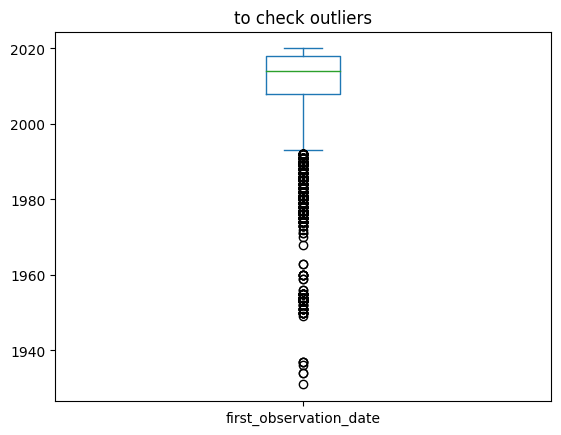

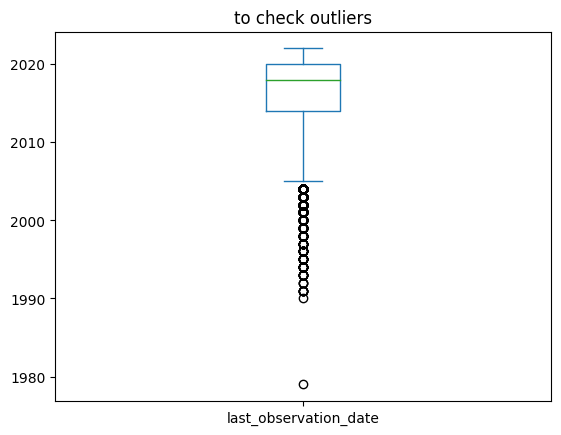

In [ ]:
for col in num:
  df[col].plot(kind='box', title='to check outliers')
  plt.show()

#FEATURE ENGINEERING

In [ ]:
df=df.drop(columns=['id','Unnamed: 0','name','orbit_id','designation','orbit_class_description'])

In [ ]:
obj= df.select_dtypes(["object","bool"])

In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in obj:
  encoder= LabelEncoder()
  df[col]= encoder.fit_transform(df[col])

print(df.dtypes)

absolute_magnitude_h                 float64
is_potentially_hazardous_asteroid      int64
is_sentry_object                       int64
kilometers_estimated_diameter_min    float64
kilometers_estimated_diameter_max    float64
orbit_class_type                       int64
perihelion_distance                  float64
aphelion_distance                    float64
first_observation_date               float64
last_observation_date                  int32
dtype: object


In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
df['last_observation_date']= std.fit_transform(df[['last_observation_date']])
df['first_observation_date']= std.fit_transform(df[['first_observation_date']])

In [ ]:
print(df.isnull().sum())

absolute_magnitude_h                 0
is_potentially_hazardous_asteroid    0
is_sentry_object                     0
kilometers_estimated_diameter_min    0
kilometers_estimated_diameter_max    0
orbit_class_type                     0
perihelion_distance                  0
aphelion_distance                    0
first_observation_date               0
last_observation_date                0
dtype: int64


In [ ]:
df.head()

,absolute_magnitude_h,is_potentially_hazardous_asteroid,is_sentry_object,kilometers_estimated_diameter_min,kilometers_estimated_diameter_max,orbit_class_type,perihelion_distance,aphelion_distance,first_observation_date,last_observation_date
neo_reference_id,,,,,,,,,,
2001981,15.22,1,0,2.401900,5.370812,1,0.621512,2.931360,-4.737982,0.993424
2002059,15.97,0,0,1.700415,3.802244,0,1.238537,4.047945,-5.958131,0.993424
2002061,16.36,0,0,1.420872,3.177167,0,1.050403,3.478155,-6.324176,0.993424
2002062,17.10,0,0,1.010543,2.259644,2,0.790185,1.143633,-6.934250,0.580172
2002063,17.28,0,0,0.930154,2.079888,1,0.701397,1.454804,-4.249923,0.993424


#SPLITTING THE DATA

In [ ]:
#did all this becasue data was imbalanced
target_0 = df[df['is_potentially_hazardous_asteroid'] == 0]. index
sample_to_keep = df[df['is_potentially_hazardous_asteroid'] == 0]. sample(2200). index
to_drop = target_0. drop (sample_to_keep)
df. drop(index = to_drop, inplace = True)

In [ ]:
x= df.drop(columns=["is_potentially_hazardous_asteroid"])
y= df["is_potentially_hazardous_asteroid"]

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,train_size= 0.8)

#MODEL SELECTION

In [ ]:
DF= pd.DataFrame(columns=['Model_Name','Training_score','Testing_score'])
DF

,Model_Name,Training_score,Testing_score


KNN WITH DIFFERENT N_NEIGHBORS

In [ ]:
from sklearn.metrics import roc_auc_score
def evaluation_model(model, xtrain, ytrain, xtest, ytest):
  model.fit(xtrain, ytrain)
  trainpred = model.predict(xtrain)
  testpred = model.predict(xtest)
  return roc_auc_score(ytrain, trainpred), roc_auc_score(ytest, testpred)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
row=[]
row.extend(['KNN(3)'])
row.extend(evaluation_model(model, xtrain, ytrain, xtest, ytest))
DF.loc[len(DF.index)] = row
result=evaluation_model(model, xtrain, ytrain, xtest, ytest)
print('score_train:',result[0])
print('score_test:',result[1])

score_train: 0.9133562945368171
score_test: 0.8823227383863079


In [ ]:
model = KNeighborsClassifier(n_neighbors=5)
row=[]
row.extend(['KNN(5)'])
row.extend(evaluation_model(model, xtrain, ytrain, xtest, ytest))
DF.loc[len(DF.index)] = row
result=evaluation_model(model, xtrain, ytrain, xtest, ytest)
print('score_train:',result[0])
print('score_test:',result[1])

score_train: 0.8993115032236173
score_test: 0.8901032328171694


In [ ]:
model = KNeighborsClassifier(n_neighbors=7)
row=[]
row.extend(['KNN(7)'])
row.extend(evaluation_model(model, xtrain, ytrain, xtest, ytest))
DF.loc[len(DF.index)] = row
result=evaluation_model(model, xtrain, ytrain, xtest, ytest)
print('score_train:',result[0])
print('score_test:',result[1])

score_train: 0.8927736681370886
score_test: 0.8832138005976636


LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced')
row=[]
row.extend(['LogisticRegression(class_weight=balanced)'])
row.extend(evaluation_model(model, xtrain, ytrain, xtest, ytest))
DF.loc[len(DF.index)] = row
result=evaluation_model(model, xtrain, ytrain, xtest, ytest)
print('roc_auc_train:',result[0])
print('roc_auc_test:',result[1])

roc_auc_train: 0.8561577875805904
roc_auc_test: 0.8622113556098886


In [ ]:
model = LogisticRegression()
row=[]
row.extend(['LogisticRegression'])
row.extend(evaluation_model(model, xtrain, ytrain, xtest, ytest))
DF.loc[len(DF.index)] = row
result=evaluation_model(model, xtrain, ytrain, xtest, ytest)
print('roc_auc_train:',result[0])
print('roc_auc_test:',result[1])

roc_auc_train: 0.8592782490668477
roc_auc_test: 0.8584324911708775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



DECISION TREES

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(class_weight='balanced')
row=[]
row.extend(['DecisionTreeClassifier(class_weight=balanced)'])
row.extend(evaluation_model(model, xtrain, ytrain, xtest, ytest))
DF.loc[len(DF.index)] = row
result=evaluation_model(model, xtrain, ytrain, xtest, ytest)
print('roc_auc_train:',result[0])
print('roc_auc_test:',result[1])

roc_auc_train: 1.0
roc_auc_test: 0.8638739472969302


In [ ]:
model = DecisionTreeClassifier(criterion='entropy')
row=[]
row.extend(['DecisionTreeClassifier(criterion=entropy)'])
row.extend(evaluation_model(model, xtrain, ytrain, xtest, ytest))
DF.loc[len(DF.index)] = row
result=evaluation_model(model, xtrain, ytrain, xtest, ytest)
print('roc_auc_train:',result[0])
print('roc_auc_test:',result[1])

roc_auc_train: 1.0
roc_auc_test: 0.8713175767454497


In [ ]:
model = DecisionTreeClassifier(max_depth=4)
row=[]
row.extend(['DecisionTreeClassifier(max_depth=4)'])
row.extend(evaluation_model(model, xtrain, ytrain, xtest, ytest))
DF.loc[len(DF.index)] = row
result=evaluation_model(model, xtrain, ytrain, xtest, ytest)
print('roc_auc_train:',result[0])
print('roc_auc_test:',result[1])

roc_auc_train: 0.9125154394299289
roc_auc_test: 0.9195544688943222


In [ ]:
model = DecisionTreeClassifier(max_depth=2)
row=[]
row.extend(['DecisionTreeClassifier(max_depth=2)'])
row.extend(evaluation_model(model, xtrain, ytrain, xtest, ytest))
DF.loc[len(DF.index)] = row
result=evaluation_model(model, xtrain, ytrain, xtest, ytest)
print('roc_auc_train:',result[0])
print('roc_auc_test:',result[1])

roc_auc_train: 0.9104258568035288
roc_auc_test: 0.919220320565064


In [ ]:
DF

,Model_Name,Training_score,Testing_score
0,KNN(3),0.913356,0.882323
1,KNN(5),0.899312,0.890103
2,KNN(7),0.892774,0.883214
3,LogisticRegression(class_weight=balanced),0.856158,0.862211
4,LogisticRegression,0.859278,0.858432
5,DecisionTreeClassifier(class_weight=balanced),1.000000,0.857650
6,DecisionTreeClassifier(criterion=entropy),1.000000,0.878541
7,DecisionTreeClassifier(max_depth=4),0.912515,0.919554
8,DecisionTreeClassifier(max_depth=2),0.910426,0.919220


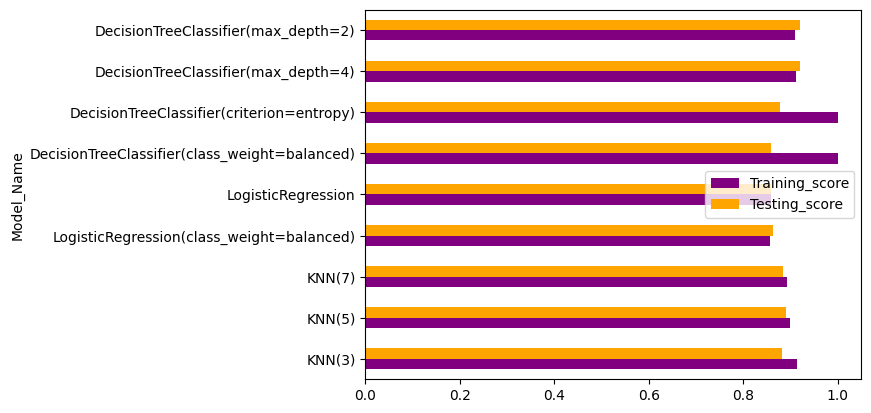

In [ ]:
ax = DF.plot.barh('Model_Name',color={"Training_score": "purple", "Testing_score": "orange"})

#TRAINING THE DATA WITH SELECTED MODEL

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4)
model.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=4)

In [ ]:
trainpred= model.predict(xtrain)

In [ ]:
testpred= model.predict(xtest)

#EVALUATION

In [ ]:
from sklearn.metrics import classification_report as clf
print(clf(ytrain,trainpred))

              precision    recall  f1-score   support

           0       1.00      0.83      0.90      1750
           1       0.85      1.00      0.92      1684

    accuracy                           0.91      3434
   macro avg       0.92      0.91      0.91      3434
weighted avg       0.92      0.91      0.91      3434



In [ ]:
print(clf(ytest,testpred))

              precision    recall  f1-score   support

           0       0.99      0.85      0.91       450
           1       0.86      0.99      0.92       409

    accuracy                           0.92       859
   macro avg       0.92      0.92      0.92       859
weighted avg       0.93      0.92      0.92       859



In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(ytrain,trainpred)

0.9125154394299289

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(ytest,testpred)

0.9195544688943222